In [1]:
# from kaggle.api.kaggle_api_extended import KaggleApi
# import kagglehub
# import kaggle
# Initiliaze API

In [9]:

from sklearn import *
import pandas as pd
import seaborn as sns
# Donwload Dataset via API unzipped
# api.dataset_download_files(dataset="prathamtripathi/drug-classification", unzip=True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
lol_df = pd.read_csv("Challenger_Ranked_Games_15minute.csv")
lol_df.shape

(26834, 51)

In [11]:
# Count the number of differences
difference_count = (lol_df['blueWins'] != lol_df['redWins']).sum()

print(f"Number of differences: {difference_count}")


Number of differences: 26834


In [12]:
#lol_df = lol_df.drop(columns=['redFirstBlood', 'blueFirstBlood'])
lol_df = lol_df.drop_duplicates()

In [14]:
lol_df = pd.get_dummies(lol_df)
lol_df.shape

(26779, 156)

# Dropping features which are highly correlated with each other

In [20]:
# Defining correlation Matrix
lol_corr = lol_df.corr()
lol_corr.head()

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,"redDragnoType_['WATER_DRAGON', 'AIR_DRAGON', 'FIRE_DRAGON']","redDragnoType_['WATER_DRAGON', 'AIR_DRAGON']","redDragnoType_['WATER_DRAGON', 'EARTH_DRAGON', 'AIR_DRAGON', 'AIR_DRAGON']","redDragnoType_['WATER_DRAGON', 'EARTH_DRAGON']","redDragnoType_['WATER_DRAGON', 'FIRE_DRAGON', 'AIR_DRAGON']","redDragnoType_['WATER_DRAGON', 'FIRE_DRAGON', 'EARTH_DRAGON']","redDragnoType_['WATER_DRAGON', 'FIRE_DRAGON']","redDragnoType_['WATER_DRAGON', 'WATER_DRAGON']",redDragnoType_['WATER_DRAGON'],redDragnoType_[]
gameId,1.000000,-0.005397,0.001830,-0.009425,0.040736,0.040736,-0.076390,-0.041898,NaN,0.001016,...,-0.001389,0.008220,-0.002263,0.002762,-0.004503,-0.006312,-0.006266,-0.024747,-0.003234,0.016960
blueWins,-0.005397,1.000000,0.225555,0.261220,0.162420,0.162420,0.160936,0.137863,NaN,0.279579,...,-0.008202,-0.072166,-0.006112,-0.069009,-0.006112,-0.006114,-0.081301,0.010583,-0.047865,0.296870
blueTotalGolds,0.001830,0.225555,1.000000,0.361546,0.919173,0.919173,-0.203182,-0.378317,NaN,0.917561,...,0.051194,-0.043565,0.025898,-0.039175,0.027971,0.046982,-0.040577,0.017233,-0.074038,0.274931
blueCurrentGolds,-0.009425,0.261220,0.361546,1.000000,0.303369,0.303369,-0.044676,-0.099753,NaN,0.377635,...,0.006676,-0.039992,0.013962,-0.036403,0.000323,0.001936,-0.024224,0.002096,-0.045992,0.190912
blueTotalLevel,0.040736,0.162420,0.919173,0.303369,1.000000,1.000000,-0.178894,-0.388435,NaN,0.800904,...,0.033329,-0.036256,0.015903,-0.031122,0.017331,0.021814,-0.034913,0.010237,-0.071560,0.251489


Iterate through the correlation matrix

In [22]:
# Threshold to consider highly correlated features
high_threshold = 0.9

# Find list pairings of highly correlated features (excluding 'blueWins')
high_corr_pairs = []
for i in range(len(lol_corr.columns)):
    for j in range(i + 1, len(lol_corr.columns)):
        if abs(lol_corr.iloc[i, j]) > high_threshold and lol_corr.index[i] != 'blueWins' and lol_corr.columns[j] != 'blueWins':
            high_corr_pairs.append([lol_corr.index[i], lol_corr.columns[j]])

# Compare correlations with 'blueWins' and determine which features to drop
features_to_drop = []
for pair in high_corr_pairs:
    feature1, feature2 = pair
    if abs(lol_corr.loc[feature1, 'blueWins']) >= abs(lol_corr.loc[feature2, 'blueWins']):
        features_to_drop.append(feature2)  # Drop the feature with lower correlation with blueWins
    else:
        features_to_drop.append(feature1)

# Remove duplicates from the features_to_drop list
features_to_drop = list(set(features_to_drop))

In [23]:
# Dropping correlated features
lol_df_dropped = lol_df.drop(columns=features_to_drop)
lol_df_dropped = lol_df_dropped.drop(columns="gameId")

In [24]:
lol_df_dropped.shape

(26779, 143)

# Dropping features which are lowly correlated with target

Iterate through the correlation matrix

In [31]:
# Dropping features with low correlation with target

# Defining new correlation Matrix
lol_corr = lol_df_dropped.corr()


#
# Threshold to consider low correlation features with 'blueWins'
low_threshold = 0.05

# Find features with correlation below the threshold with 'blueWins'
low_corr_features = []
for feature in lol_corr.index:
    if feature != 'blueWins' and abs(lol_corr.loc[feature, 'blueWins']) < low_threshold:
        low_corr_features.append(feature)

# Output the list of features with low correlation to 'blueWins'

In [32]:
lol_df_dropped_2 = lol_df_dropped.drop(columns=low_corr_features)

In [33]:
lol_df_dropped_2.shape

(26779, 68)

In [34]:
lol_df_dropped_2.redWins

0        1
1        0
2        1
3        1
4        0
        ..
26829    1
26830    1
26831    1
26832    0
26833    0
Name: redWins, Length: 26779, dtype: int64

# KNN Machine Learning

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
features = lol_df_dropped_2.drop(columns=['blueWins','redWins'])
target = lol_df_dropped_2["blueWins"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

#Normalize Data after Train Split
normalizer = MinMaxScaler() #define normalizer

normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train) # Normalize 80% training dats
X_test_norm = normalizer.transform(X_test) # Normalize 20% Testing Data

#Apply to test and training data
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)


In [44]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
knn.score(X_test_norm, y_test)

0.7378640776699029

In [47]:
knn.predict(X_test_norm)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

<h1>Logistic Regression</h1>

In [76]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  
log_reg.fit(X_train_norm, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_norm)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Calculate F1 score
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')  # Use 'macro' or 'micro' if needed

# Calculate confusion matrix
confusion_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Print the results
print("Predictions:", y_pred_log_reg)
print("Accuracy:", accuracy_log_reg)
print("F1 Score:", f1_log_reg)
print("Confusion Matrix:\n", confusion_log_reg)

Predictions: [0 1 1 ... 1 0 1]
Accuracy: 0.8084391336818522
F1 Score: 0.8084333631228355
Confusion Matrix:
 [[2129  519]
 [ 507 2201]]


In [99]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize the AdaBoost Classifier with Logistic Regression as the base estimator
ada_boost = AdaBoostClassifier(estimator=log_reg, n_estimators=100)

# Fit the AdaBoost model on the training data
ada_boost.fit(X_train_norm, y_train)

# Make predictions on the test data
y_pred_ada = ada_boost.predict(X_test_norm)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Calculate F1 score
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')  # Use 'macro' or 'micro' if needed

# Calculate confusion matrix
confusion_ada = confusion_matrix(y_test, y_pred_ada)

# Print the results
print("Predictions:", y_pred_ada)
print("Accuracy:", accuracy_ada)
print("F1 Score:", f1_ada)
print("Confusion Matrix:\n", confusion_ada)

C:\Users\Michimon\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Predictions: [0 1 1 ... 1 0 1]
Accuracy: 0.761949215832711
F1 Score: 0.7619476472393389
Confusion Matrix:
 [[2009  639]
 [ 636 2072]]


In [125]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize the Gradient Boosting Classifier with Logistic Regression as the base estimator
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.17)

# Fit the Gradient Boosting model on the training data
grad_boost.fit(X_train_norm, y_train)

# Make predictions on the test data
y_pred_grad = grad_boost.predict(X_test_norm)

# Calculate accuracy
accuracy_grad = accuracy_score(y_test, y_pred_grad)

# Calculate F1 score
f1_grad = f1_score(y_test, y_pred_grad, average='weighted')  # Use 'macro' or 'micro' if needed

# Calculate confusion matrix
confusion_grad = confusion_matrix(y_test, y_pred_grad)

# Print the results
print("Predictions:", y_pred_grad)
print("Accuracy:", accuracy_grad)
print("F1 Score:", f1_grad)
print("Confusion Matrix:\n", confusion_grad)

Predictions: [0 1 1 ... 1 0 1]
Accuracy: 0.8114264376400299
F1 Score: 0.811417206424451
Confusion Matrix:
 [[2134  514]
 [ 496 2212]]


<h1>DECISION TREE</h1>

In [51]:
from sklearn.tree import DecisionTreeClassifier


# Initialize and fit the model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_norm, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test_norm)
y_pred_tree

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
tree_clf.score(X_test_norm, y_test)

0.7233009708737864

In [55]:
accuracy = accuracy_score(y_test, y_pred_tree)
accuracy

0.7233009708737864

<h1>Random Forest</h1>

In [72]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_norm, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test_norm)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Use 'macro' or 'micro' depending on your needs

# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Print
print("Predictions:", y_pred_rf)
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", confusion_rf)

Predictions: [0 0 1 ... 0 0 1]
Accuracy: 0.8041448842419716
F1 Score: 0.8041359453600732
Confusion Matrix:
 [[2115  533]
 [ 516 2192]]


In [128]:
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=15)
bagging_clf.fit(X_train_norm, y_train)

# Make predictions
y_pred_bagging = bagging_clf.predict(X_test_norm)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Calculate F1 score
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')  # Use 'macro' or 'micro' depending on your needs

# Calculate confusion matrix
confusion_bagging = confusion_matrix(y_test, y_pred_bagging)

# Print results
print("Predictions:", y_pred_bagging)
print("Accuracy:", accuracy_bagging)
print("F1 Score:", f1_bagging)
print("Confusion Matrix:\n", confusion_bagging)


Predictions: [0 1 1 ... 0 0 1]
Accuracy: 0.8084391336818522
F1 Score: 0.8083957351105131
Confusion Matrix:
 [[2107  541]
 [ 485 2223]]


<h1>Stacking</h1>

In [137]:
from sklearn.ensemble import StackingClassifier

# Initialize the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('log_reg', log_reg)],
    final_estimator=LogisticRegression(max_iter=1000)  # Meta-model
)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train_norm, y_train)

# Make predictions on the test data
y_pred_stack = stacking_clf.predict(X_test_norm)

# Calculate accuracy
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Calculate F1 score
f1_stack = f1_score(y_test, y_pred_stack, average='weighted')  # Use 'macro' or 'micro' if needed

# Calculate confusion matrix
confusion_stack = confusion_matrix(y_test, y_pred_stack)

# Print the results
print("Predictions:", y_pred_stack)
print("Accuracy:", accuracy_stack)
print("F1 Score:", f1_stack)
print("Confusion Matrix:\n", confusion_stack)

Predictions: [0 1 1 ... 1 0 1]
Accuracy: 0.8121732636295743
F1 Score: 0.8121488725305535
Confusion Matrix:
 [[2126  522]
 [ 484 2224]]


Accuracy: 0.8121732636295743
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2648
           1       0.81      0.82      0.82      2708

    accuracy                           0.81      5356
   macro avg       0.81      0.81      0.81      5356
weighted avg       0.81      0.81      0.81      5356

Precision: 0.809905316824472
Recall: 0.8212703101920237


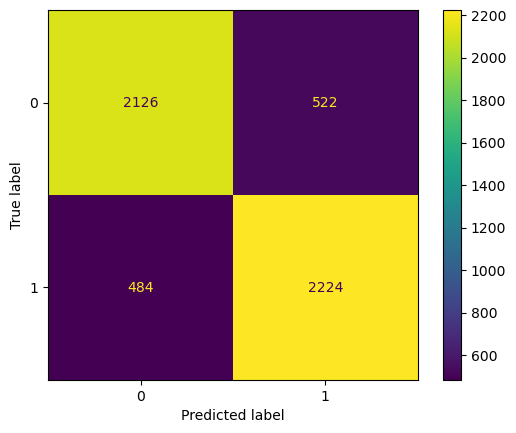

In [141]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Define the evaluate_model function
def evaluate_model(model, x_test_norm, y_test, y_pred_stack):
    print("Accuracy:", model.score(x_test_norm, y_test))
    print(classification_report(y_pred=y_pred_stack, y_true=y_test))
    cm = confusion_matrix(y_test, y_pred_stack, labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    print("Precision:", precision)
    print("Recall:", recall)

# Use the evaluate_model function to print evaluation metrics for the stacking model
evaluate_model(stacking_clf, X_test_norm, y_test, y_pred_stack)

<h1>Support Vector Machine</h1>

In [60]:
from sklearn.svm import SVC

# Initialize and fit the model
svm_clf = SVC(probability=True)  # Set probability=True to enable probability predictions
svm_clf.fit(X_train_norm, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test_norm)
y_pred_svm

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [61]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.7972367438386856